#  Time Series Forecasting project
## Built a model to Forecast monthly sales of Wine for certain Wine Estate for the next 12 month

## Packages Used:

In [7]:
# General
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()

In [8]:
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
from datetime import datetime
from pandas import datetime
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
from pandas  import  Grouper, concat
import calendar
import  statsmodels.api as  sm
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

In [10]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Problem: 
For this particular assignment, the data of wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Dataset Background:
- Monthly Sales Data of 'Rose' Wine manufactured by ABC Estate Wines starting from Jan 1980 to July 1995 is provided.
- As an analyst in the ABC Estate Wines, the task is to analyse and forecast Wine Sales in the 20th century.

## Data Dictionary of the Dataset:
- The dataset 'Rose' contain two columns of data:
    - The monthly time stamp from Jan 1980 to July 1995 and the sales corresponding to the wines. 

## Data Ingestion:

## Loading the Dataset as Time Series data:

In [12]:
rose = pd.read_csv('Rose.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [13]:
printmd('**Viewing the top 5 rows of Rose dataset :**')
rose.head()

**Viewing the top 5 rows of Rose dataset :**

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [14]:
printmd('**Viewing the bottom 5 rows of Rose dataset :**')
rose.tail()

**Viewing the bottom 5 rows of Rose dataset :**

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

## Inferences:
- All values are properly loaded for the dataset with the index as pandas datetime format.
- The 'Rose' Time series has values in float64 datatype format.

## Checking for Null values:
- As it is a Time Series data, handling Null values is of utmost importance. The null values cannot be dropped as the Time seriies data need to contiguous, so they need to be properly imputed.

In [15]:
printmd('**The number of Null values in Rose dataset:**')
print(rose.isnull().sum())
printmd('**The datetime stamps for which the Time Series Data in Rose is not present:**')
nan_list = list(rose[rose.isnull() == True].index)
rose[rose.isnull() == True]

**The number of Null values in Rose dataset:**

2


**The datetime stamps for which the Time Series Data in Rose is not present:**

YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

## Inferences:
- There are two Null values in Rose dataset, they are for the time stamp '1994-07-01' and '1994-08-01'.

## Plotting the Rose Time Series:
- Note: The Rose Time Series has two Null values for time stamp: '1994-07-01' and '1994-08-01'.

**Monthly Sales Data of Rose Wines:**

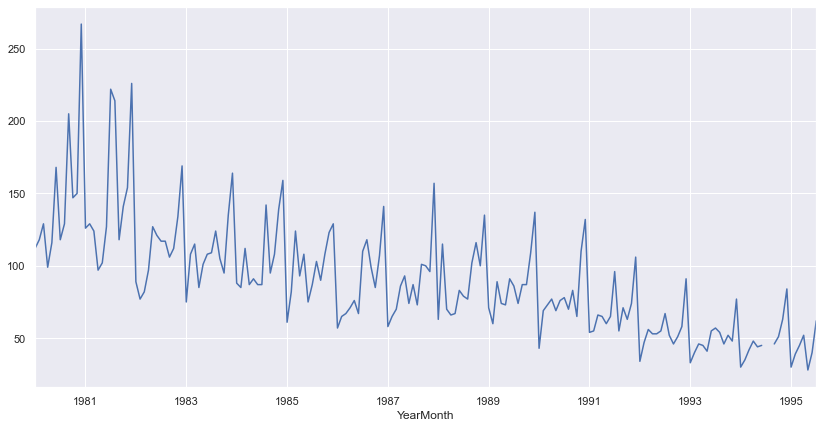

In [16]:
printmd('**Monthly Sales Data of Rose Wines:**')
rose.plot();

## Inferences:
- A decreasing Trend could be observed with a multiplicative seasonality present.
- The Null values could be observed as a break in the plot for the observed timestamps.

## Imputing the Null Values:
- A polynomial of order 2 imputation is done here.

In [17]:
rose = rose.interpolate(method = 'polynomial', order = 2)
printmd('**The new interpolated values of the previously missing values:**')
rose[rose.index.isin(nan_list) == True]

**The new interpolated values of the previously missing values:**

YearMonth
1994-07-01    45.364189
1994-08-01    44.279246
Name: Rose, dtype: float64

## Inferences:
- The missing values are imputed using polynomial interpolation of order 2. The new values for the index '1994-07-01' is 45.36 and for index '1994-08-01' is 44.28 approximately. 
- Note that the although the sales numbers should be whole numbers but here we are getting float values due to interpolation. The values are kept as it is and not rounded off.

**Monthly Sales Data of Rose Wines after missing value treatment:**

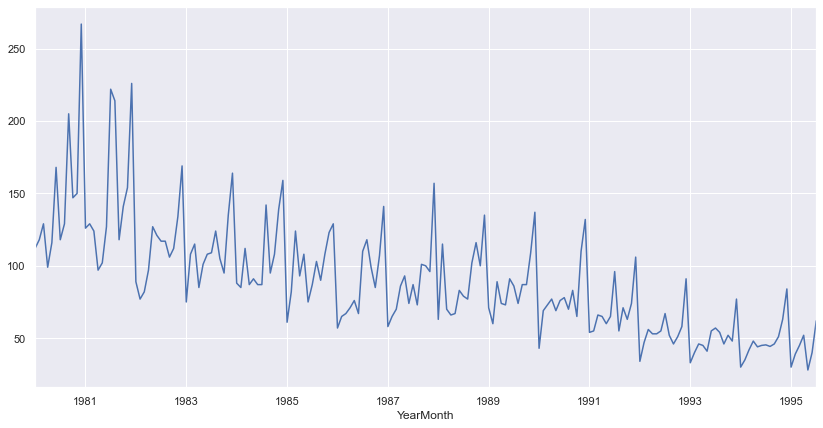

In [18]:
printmd('**Monthly Sales Data of Rose Wines after missing value treatment:**')
rose.plot();

## Inferences:
- The plot now could be observed with no missing values.

## EDA

## Check the basic measures of descriptive statistics:

In [19]:
printmd('**Data Description for Rose Dataset:**')
rose.describe()

**Data Description for Rose Dataset:**

count    187.000000
mean      89.907184
std       39.246679
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

## Inferences:
- The mean value of the Time Series is nearly same as the median values. As a time series data it may signify presence of decreasing trend and multiplicative seasonality.

### Yearly Boxplot

**Yearly Boxplot for Rose Dataset:**

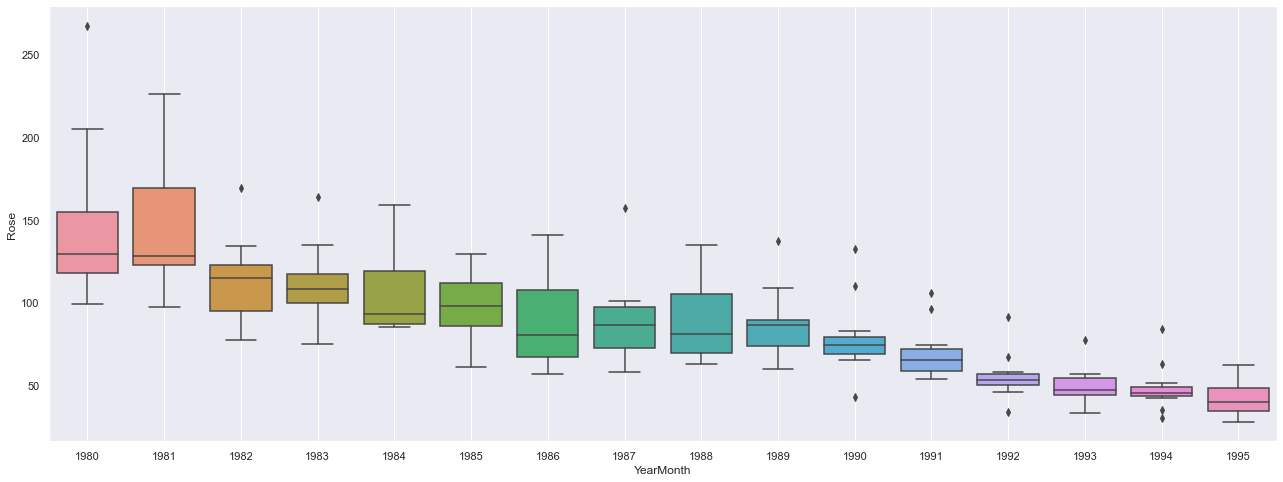

In [20]:
printmd('**Yearly Boxplot for Rose Dataset:**')
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.year,y = rose,ax=ax)
plt.grid();

## Inferences:
- It shows that there is a yearly decreasing Trend present.

### Monthly Plot

**Monthly Boxplot for all the years for Rose Dataset:**

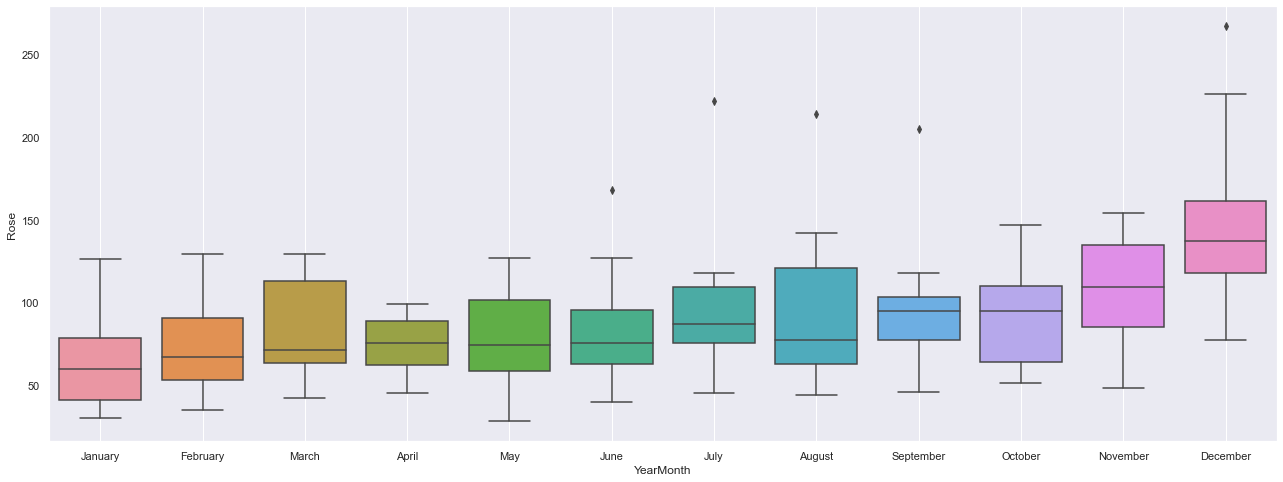

In [21]:
printmd('**Monthly Boxplot for all the years for Rose Dataset:**')
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose,ax=ax)
plt.grid();

## Inferences:
- The monthly plot shows that certain months have higher values than others indicating presence of seasonality. 

## Plot graph of monthly Wine sales across years:

In [22]:
monthly_sales_across_years_rose = pd.pivot_table(pd.DataFrame(rose), columns = rose.index.month, 
                                                      index = rose.index.year)
monthly_sales_across_years_rose

Rose                                                            \
YearMonth     1      2      3     4      5      6           7           8    
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.364189   44.279246   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

                                       
YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

**Monthly Wine sales across years for Rose:**

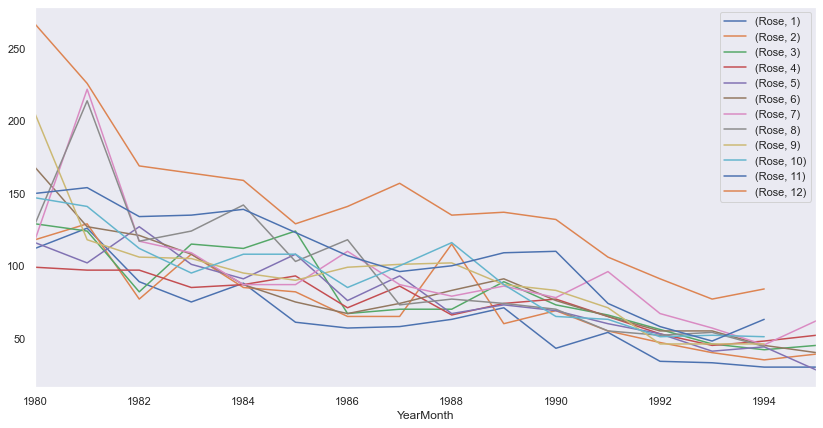

In [23]:
printmd('**Monthly Wine sales across years for Rose:**')
monthly_sales_across_years_rose.plot()
plt.grid()
plt.legend(loc='best');

## Inferences:
- A decreasing Trend could be observed for the different months along the Years. 
- Certain months have comparitively higher values throughout the years.

## Change in Percentage of Two Consecutive Months:

**Change in Percentage of Two Consecutive Months for Rose:**

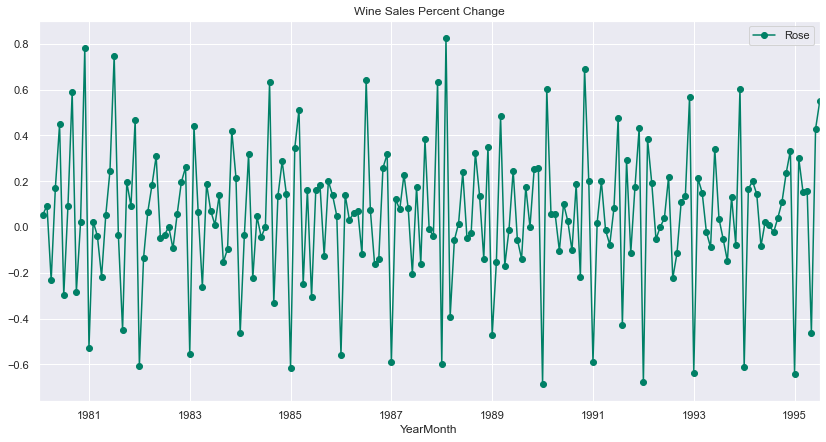

In [24]:
printmd('**Change in Percentage of Two Consecutive Months for Rose:**')
pct_change = rose.groupby(rose.index).sum().pct_change()
pct_change.plot(legend=True,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)
plt.show()

## Inferences:
- There certain higher percentage changes between months present periodically suggesting presence of Seasonality. 

## Decomposition:
- By observing the plot above we have seen presence of multiplicative seasonality and thus decompose the rose time series accordingly.

**Decomposition of Rose Time Series with multiplicative Seasonality:**

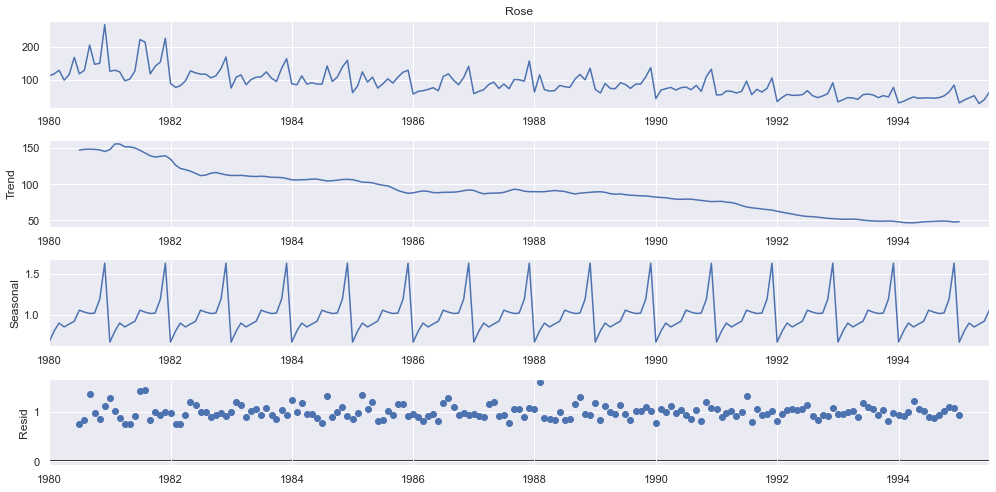

In [25]:
printmd('**Decomposition of Rose Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(rose,model='multiplicative')
decomposition_mul.plot();

## Inferences:
- The time series is decomposed and a decreasing trend is observed. Also the residuals look random and in general not with high deviations.

# Train Test Split:
- **The test data is selected starting from 1991.**

In [26]:
train_rose = rose[rose.index.year < 1991]
test_rose = rose[rose.index.year > 1990]

In [27]:
print('Length of Train Data:', len(train_rose))
print('Length of Test Data:', len(test_rose))

Length of Train Data: 132
Length of Test Data: 55


In [28]:
print('First few rows of Training Data:','\n',train_rose.head(),'\n')
print('Last few rows of Training Data:','\n',train_rose.tail(),'\n')
print('First few rows of Test Data:','\n',test_rose.head(),'\n')
print('Last few rows of Test Data:','\n',test_rose.tail(),'\n')

First few rows of Training Data: 
 YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64 

Last few rows of Training Data: 
 YearMonth
1990-08-01     70.0
1990-09-01     83.0
1990-10-01     65.0
1990-11-01    110.0
1990-12-01    132.0
Name: Rose, dtype: float64 

First few rows of Test Data: 
 YearMonth
1991-01-01    54.0
1991-02-01    55.0
1991-03-01    66.0
1991-04-01    65.0
1991-05-01    60.0
Name: Rose, dtype: float64 

Last few rows of Test Data: 
 YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64 



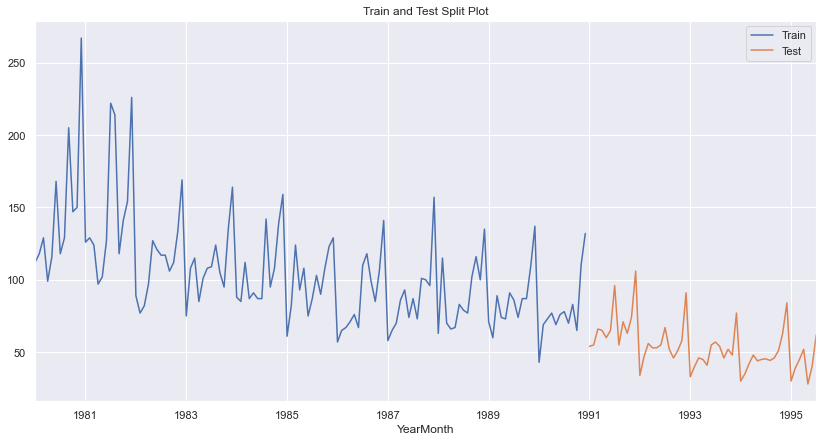

In [29]:
train_rose.plot(label = 'Train')
test_rose.plot(label = 'Test')
plt.legend()
plt.title('Train and Test Split Plot');

## Inferences :
- The train test split is done with the test data staring from the year 1991. 
- There 132 values in the Train set and 55 values in the test set. 
- The starting and ending values are also observed for the train and test set.
- A plot showing the train and test together is also observed.

## Building different models:

## Model 1: Linear Regression
- Steps:
    1. Generating a Linear numerical time instance order for both the training and test set and then adding it to the dataset.
    2. Build a Linear Regression Model.
    3. Predict the output and measure RMSE on Test Data.

In [30]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+len(train_rose)+1 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [32]:
lr = LinearRegression()
train_time = np.array(train_time).reshape(-1,1)
test_time = np.array(test_time).reshape(-1,1)

In [33]:
lr.fit(train_time,LinearRegression_train_rose)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
train_predictions_reg = lr.predict(train_time)
train_predictions_reg = pd.Series(train_predictions_reg, index = train_rose.index)
test_predictions_reg = lr.predict(test_time)
test_predictions_reg = pd.Series(test_predictions_reg, index = test_rose.index)

In [35]:
train_predictions_reg.head()

YearMonth
1980-01-01    137.321144
1980-02-01    136.826766
1980-03-01    136.332388
1980-04-01    135.838010
1980-05-01    135.343632
dtype: float64

In [36]:
printmd('**Viewing the first five Predictions for Test Data:**')
test_predictions_reg.head()

**Viewing the first five Predictions for Test Data:**

YearMonth
1991-01-01    72.063266
1991-02-01    71.568888
1991-03-01    71.074511
1991-04-01    70.580133
1991-05-01    70.085755
dtype: float64

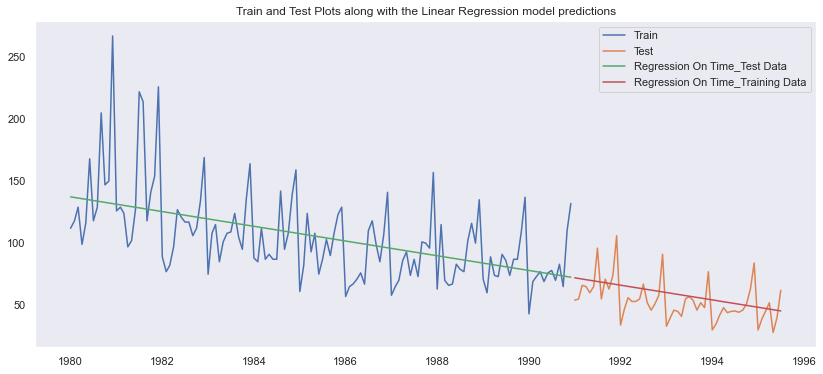

In [37]:
plt.figure(figsize=(14,6))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(train_predictions_reg, label='Regression On Time_Test Data')
plt.plot(test_predictions_reg, label='Regression On Time_Training Data')
plt.title('Train and Test Plots along with the Linear Regression model predictions')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [38]:
rmse_reg = np.sqrt(metrics.mean_squared_error(test_rose,test_predictions_reg))
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))

For Regression On Time forecast on the Test Data, RMSE is 15.278 


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['Regression On Time'])
resultsDf.iloc[-1,:]

Test RMSE    15.278369
Name: Regression On Time, dtype: float64

## Inferences:
- The Linear Regression model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 15.28 approximately.

## Model 2: Naive Approach
- Steps:
    1. The Naive model is a level prediction with the prediction as $\hat{y}_{t+1} = y_t$
    2. Build the Naive Model.
    3. Predict the output and measure RMSE on Test Data.

In [40]:
NaiveModel_train = pd.Series(train_rose.iloc[-1], index = train_rose.index)
NaiveModel_train.head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
dtype: float64

In [41]:
NaiveModel_test = pd.Series(train_rose.iloc[-1], index = test_rose.index)
printmd('**Viewing the first five Predictions for Test Data:**')
NaiveModel_test.head()

**Viewing the first five Predictions for Test Data:**

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
dtype: float64

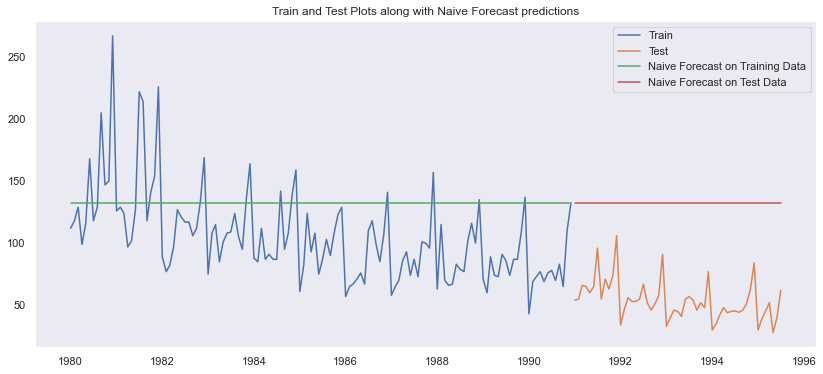

In [42]:
plt.figure(figsize=(14,6))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(NaiveModel_train, label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test, label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Train and Test Plots along with Naive Forecast predictions")
plt.grid();

### Model Evaluation

In [43]:
rmse_naive = np.sqrt(metrics.mean_squared_error(test_rose,NaiveModel_test))
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 79.746 


In [44]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.iloc[-1,:]

Test RMSE    79.745697
Name: Naive Model, dtype: float64

## Inferences:
- The Naive model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 79.74 approximately. 

## Method 3: Simple Average
- Steps:
    1. The Simple Average model prediction is a level prediction with the prediction calculated by finding the average of the Training values.
    2. Build the Simple Average model.
    3. Predict the output and measure RMSE on Test Data.

In [45]:
SimpleAverage_train = pd.Series(train_rose.mean(), index = train_rose.index)
SimpleAverage_train.head()

YearMonth
1980-01-01    104.939394
1980-02-01    104.939394
1980-03-01    104.939394
1980-04-01    104.939394
1980-05-01    104.939394
dtype: float64

In [46]:
SimpleAverage_test = pd.Series(train_rose.mean(), index = test_rose.index)
printmd('**Viewing the first five Predictions for Test Data:**')
SimpleAverage_test.head()

**Viewing the first five Predictions for Test Data:**

YearMonth
1991-01-01    104.939394
1991-02-01    104.939394
1991-03-01    104.939394
1991-04-01    104.939394
1991-05-01    104.939394
dtype: float64

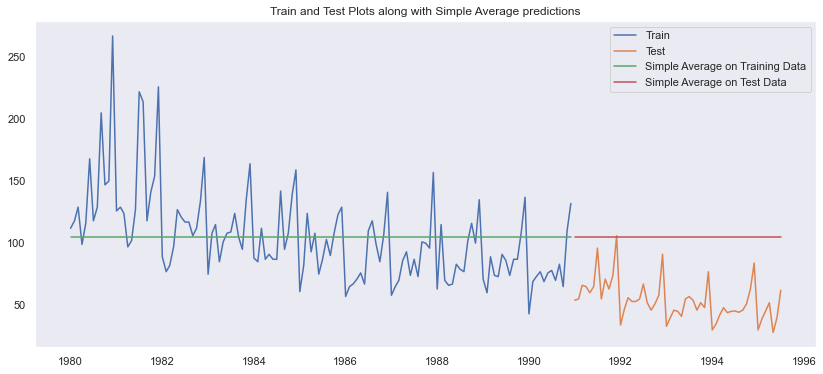

In [47]:
plt.figure(figsize=(14,6))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(SimpleAverage_train, label= 'Simple Average on Training Data')
plt.plot(SimpleAverage_test, label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Train and Test Plots along with Simple Average predictions")
plt.grid();

### Model Evaluation

In [48]:
rmse_simple_avg = np.sqrt(metrics.mean_squared_error(test_rose, SimpleAverage_test))
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 53.488 


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.iloc[-1,:]

Test RMSE    53.488233
Name: Simple Average Model, dtype: float64

## Inferences:
- The Simple Average model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 53.49 approximately.

## Method 4: Simple Exponential Smoothing
- Steps:
    1. The Simple Exponential Smoothing has the 'smoothing level' parameter $\alpha$ which is optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
    2. Build the Simple Exponential Smoothing model.
    3. Predict the output and measure RMSE on Test Data.

In [50]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [51]:
model_SES = SimpleExpSmoothing(SES_train)

## Auto fit Model:

In [52]:
model_SES_autofit = model_SES.fit(optimized=True)

In [53]:
printmd('**The output parameters for optimized model are:**')
model_SES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.09875003987520162,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Inferences:
- The smoothing level $\alpha$ according to optimization is 0.0987 approximately, which means the all the past values are given nearly equal importance.

In [54]:
SES_train_predict = model_SES_autofit.fittedvalues
SES_train_predict.head()

YearMonth
1980-01-01    134.387120
1980-02-01    132.176391
1980-03-01    130.776472
1980-04-01    130.601045
1980-05-01    127.480441
dtype: float64

In [55]:
SES_test_predict = model_SES_autofit.forecast(steps=len(test_rose))
printmd('**Viewing the first five Predictions for Test Data:**')
SES_test_predict.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    87.105003
1991-02-01    87.105003
1991-03-01    87.105003
1991-04-01    87.105003
1991-05-01    87.105003
Freq: MS, dtype: float64

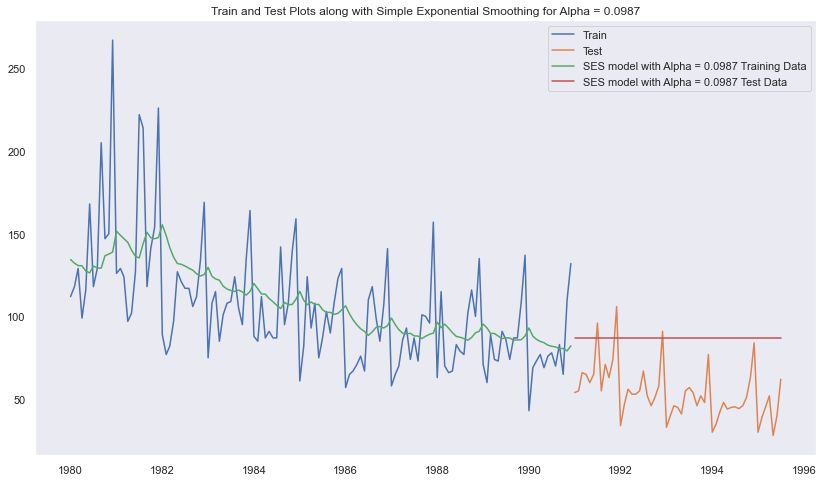

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(14,8))
plt.plot(SES_train, label='Train')
plt.plot(SES_test, label='Test')

plt.plot(SES_train_predict, label='SES model with Alpha = 0.0987 Training Data')
plt.plot(SES_test_predict, label='SES model with Alpha = 0.0987 Test Data')
plt.title('Train and Test Plots along with Simple Exponential Smoothing for Alpha = 0.0987')
plt.legend(loc='best')
plt.grid();

## Model Evaluation from Autofit Model:
- Smoothing Level ($\alpha$) is 0.0987.

In [57]:
## Test Data
rmse_model5_test = np.sqrt(metrics.mean_squared_error(SES_test,SES_test_predict))
print("For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model5_test))


For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 36.824 


In [58]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0.0987, Simple Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.iloc[-1,:]

Test RMSE    36.824482
Name: Alpha=0.0987, Simple Exponential Smoothing Optimized, dtype: float64

## Inferences:
- It is observed that for Single Exponential smoothing using the optimized method on Train data gives an RMSE value of 36.82 approximately for smoothing level $\alpha$ = 0.0987.

## Iterative Method for Simple Exponential Smoothing
- Here we will set different alpha values.

In [59]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_SES_iter = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
                                
resultsDf_SES_iter

,Alpha Values,Test RMSE


In [60]:
SES_train = pd.DataFrame(SES_train)
SES_test = pd.DataFrame(SES_test)
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_rose))
    

    
    rmse_model5_test_i = np.sqrt(metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i]))
    
    resultsDf_SES_iter = resultsDf_SES_iter.append({'Alpha Values':i, 'Test RMSE':rmse_model5_test_i}, ignore_index=True)
                                                                           

## Model Evaluation based on Iterations:

In [61]:
resultsDf_SES_iter.sort_values(by = 'Test RMSE')

,Alpha Values,Test RMSE
2,0.10,36.856268
1,0.05,37.039679
3,0.15,38.750307
4,0.20,41.389972
5,0.25,44.388786
6,0.30,47.532697
7,0.35,50.693433
8,0.40,53.795058
9,0.45,56.794685
10,0.50,59.669244


## Inferences:
- It is observed that RMSE on Test decreases is least for alpha = 0.1, a value of 36.85. This is very close to alpha = 0.0987 as obtained for optimization model. And hence we will keep the optimized value of Alpha as the best model parameter for Single Exponential Smoothing. 
- Also note that it is very close to the second lowest value of 37.04 and hence running any iterations between alpha value of 0.05 and 0.1 will not be fruitful enough.

## Method 5: Double Exponential Smoothing (Holt's Model)
- Steps:
    1. The Double Exponential Smoothing has two parameters 'smoothing level' ($\alpha$) and 'smoothing_slope' ($\beta$) parameter which are optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
    2. Build the Double Exponential Smoothing model.
    3. Predict the output and measure RMSE on Test Data.

In [62]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()
DES_train = pd.DataFrame(DES_train)
DES_test = pd.DataFrame(DES_test)

In [63]:
model_DES = Holt(DES_train['Rose'])

## Auto fit Model:

In [64]:
model_DES_autofit = model_DES.fit(optimized=True)

In [65]:
printmd('**The output parameters for optimized model are:**')
model_DES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Inferences:
- According to optimization the smoothing level $\alpha$  is 0.1579 approx and  smoothing slope $\beta$ is 0.1579 approx.

In [66]:
DES_train_predict = model_DES_autofit.fittedvalues
DES_train_predict.head()

YearMonth
1980-01-01    118.000000
1980-02-01    122.903047
1980-03-01    127.857061
1980-04-01    133.794198
1980-05-01    133.189605
dtype: float64

In [67]:
DES_test_predict = model_DES_autofit.forecast(steps=len(test_rose))
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test_predict.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    86.863579
1991-02-01    88.028056
1991-03-01    89.192534
1991-04-01    90.357011
1991-05-01    91.521488
Freq: MS, dtype: float64

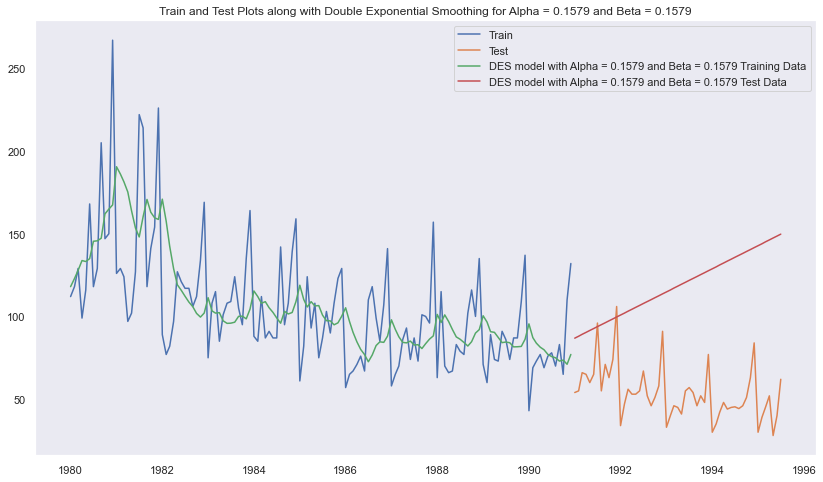

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(14,8))
plt.plot(DES_train, label='Train')
plt.plot(DES_test, label='Test')

plt.plot(DES_train_predict, label='DES model with Alpha = 0.1579 and Beta = 0.1579 Training Data')
plt.plot(DES_test_predict, label='DES model with Alpha = 0.1579 and Beta = 0.1579 Test Data')
plt.title('Train and Test Plots along with Double Exponential Smoothing for Alpha = 0.1579 and Beta = 0.1579')
plt.legend(loc='best')
plt.grid();

## Inferences:
- It is observed that the Trend is not properly captured by the optimized method. The iterative method may get us better results.

## Model Evaluation from Autofit Model:
- For a smoothing level $\alpha$  equal to 0.1579 approx and smoothing slope $\beta$ equal to 0.1579.

In [69]:
## Test Data

rmse_model_test_des_autofit = np.sqrt(metrics.mean_squared_error(DES_test,DES_test_predict))
print("For Alpha=0.1579, Beta=0.1579 Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " 
      %(rmse_model_test_des_autofit))

For Alpha=0.1579, Beta=0.1579 Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 70.605 


In [70]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [rmse_model_test_des_autofit]}
                           ,index=['Alpha=0.1579, Beta=0.1579, Double Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf.iloc[-1,:]

Test RMSE    70.604598
Name: Alpha=0.1579, Beta=0.1579, Double Exponential Smoothing Optimized, dtype: float64

## Inferences:
- It is observed that for Double Exponential smoothing using the optimized method on Train data gives an RMSE value of 70.6 approximately for smoothing level $\alpha$ = 0.1579 and smoothing slope $\beta$ = 0.1579 on Test Data.

## Iterative Method for Double Exponential Smoothing
- Here we will set different alpha and beta values.

In [71]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_DES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
                                
resultsDf_DES_iter

,Alpha Values,Beta Values,Test RMSE


In [72]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_rose))
        
        
        
        rmse_model6_test = np.sqrt(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j]))
        
        
        resultsDf_DES_iter = resultsDf_DES_iter.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
                                      

In [73]:
resultsDf_DES_iter

,Alpha Values,Beta Values,Test RMSE
0,0.0,0.00,1023.335232
1,0.0,0.05,1023.335232
2,0.0,0.10,1023.335232
3,0.0,0.15,1023.335232
4,0.0,0.20,1023.335232
...,...,...,...
436,1.0,0.80,853.998945
437,1.0,0.85,848.516890
438,1.0,0.90,834.744335
439,1.0,0.95,812.146339


In [74]:
printmd('**The top 5 Alpha and Beta combination based on Least Test RMSE values**')
resultsDf_DES_iter.sort_values(by=['Test RMSE']).head()

**The top 5 Alpha and Beta combination based on Least Test RMSE values**

,Alpha Values,Beta Values,Test RMSE
28,0.05,0.35,16.343344
27,0.05,0.30,18.640750
24,0.05,0.15,23.741250
22,0.05,0.05,31.555972
29,0.05,0.40,31.609086


## Inferences:
- The minimum Test RMSE is obtained at smoothing level ($\alpha$) equal to 0.05 and smoothing slope ($\beta$) equal to 0.35.

In [75]:
resultsDf_DES_iter = resultsDf_DES_iter.sort_values(by=['Test RMSE'])
resultsDf_DES_iter.reset_index(drop =True, inplace =True)

In [76]:
DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

YearMonth
1980-01-01    118.000000
1980-02-01    123.595000
1980-03-01    129.112337
1980-04-01    134.901842
1980-05-01    138.273589
Name: (predict, 0.05, 0.35000000000000003), dtype: float64

In [77]:
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

**Viewing the first five Predictions for Test Data:**

YearMonth
1991-01-01    73.523142
1991-02-01    73.078657
1991-03-01    72.634171
1991-04-01    72.189686
1991-05-01    71.745200
Name: (predict, 0.05, 0.35000000000000003), dtype: float64

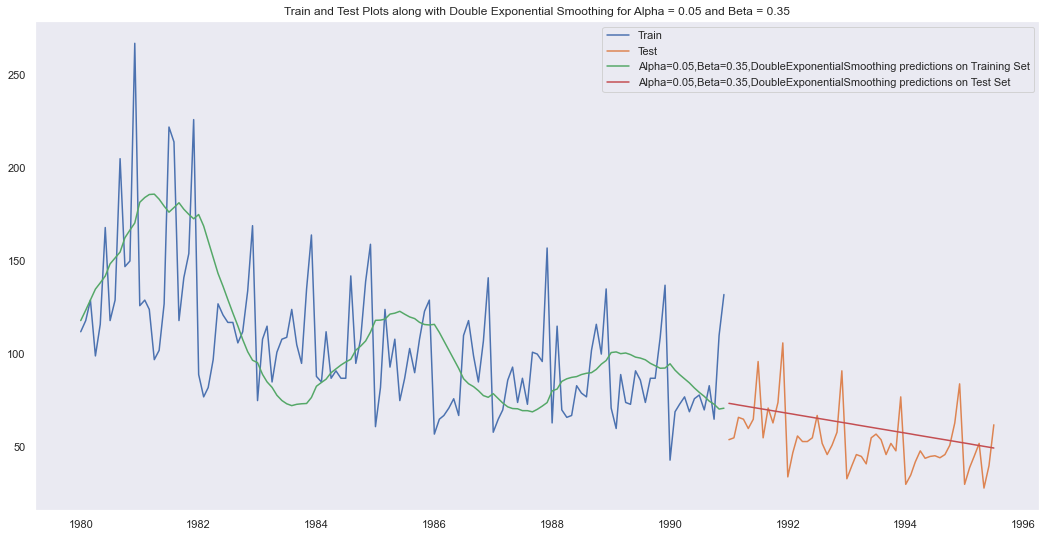

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='Alpha=0.05,Beta=0.35,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='Alpha=0.05,Beta=0.35,DoubleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Double Exponential Smoothing for Alpha = 0.05 and Beta = 0.35')

plt.legend(loc='best')
plt.grid();

## Inferences:
- The Trend is properly captured as observed above.

In [79]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_DES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    16.343344
Name: Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative, dtype: float64

## Inferences:
- It is observed that for Double Exponential smoothing the minimum value of RMSE on Test is  16.34 as obtained by using the iterative method for smoothing level $\alpha$ = 0.05 and smoothing slope $\beta$ = 0.35.

## Method 6: Triple Exponential Smoothing (Holt - Winter's Model)
- Steps:
    1. The Triple Exponential Smoothing has three parameters 'smoothing level' ($\alpha$), 'smoothing_slope' ($\beta$) and 'smoothing seasonal' ($\gamma$) parameter which are optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
    2. Build the Double Exponential Smoothing model.
    3. Predict the output and measure RMSE on Test Data.

In [80]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()
TES_train = pd.DataFrame(TES_train)
TES_test = pd.DataFrame(TES_test)

In [81]:
model_TES= ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')

## Auto fit Model:

In [82]:
model_TES_autofit = model_TES.fit(optimized=True)

In [83]:
printmd('**The output parameters for optimized model are:**')
model_TES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.10609635974778751,
 'smoothing_slope': 0.048438458440198374,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565186546128,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550231, 1.65927093, 1.80572588, 1.58888782, 1.77822665,
        1.92604314, 2.11649409, 2.25135146, 2.11690519, 2.08112772,
        2.40927212, 3.30448044]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Inferences:
- The parameter values for Autofit model are as follows:
    1. 'smoothing_level'($\alpha$): 0.1061
    2. 'smoothing_slope'($\beta$): 0.0484
    3. 'smoothing_seasonal'($\gamma$): 0

In [84]:
## Prediction on the training data
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,113.105592
1980-02-01,118.0,127.054197
1980-03-01,129.0,137.165593
1980-04-01,99.0,119.844348
1980-05-01,116.0,131.432556


In [85]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose))
printmd('**Viewing the first five Predictions for Test Data:**')
TES_test.head()

**Viewing the first five Predictions for Test Data:**

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.674338
1991-02-01,55.0,63.471271
1991-03-01,66.0,68.788789
1991-04-01,65.0,60.277826
1991-05-01,60.0,67.180381


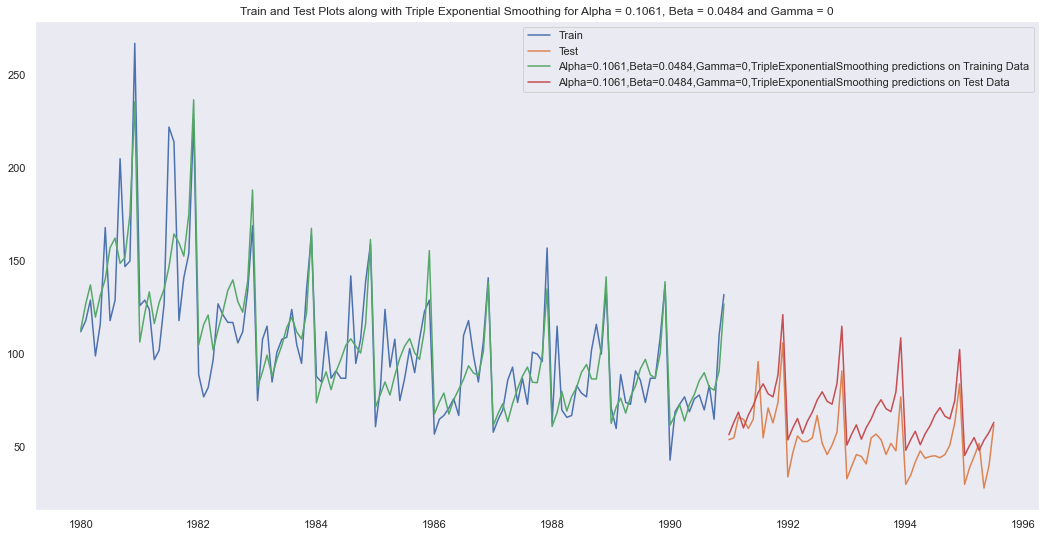

In [86]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.1061,Beta=0.0484,Gamma=0,TripleExponentialSmoothing predictions on Training Data')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1061,Beta=0.0484,Gamma=0,TripleExponentialSmoothing predictions on Test Data')
plt.title('Train and Test Plots along with Triple Exponential Smoothing for Alpha = 0.1061, Beta = 0.0484 and Gamma = 0')


plt.legend(loc='best')
plt.grid();

In [87]:
## Test Data

rmse_model_test_TES_auto = np.sqrt(metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict']))
print("For Alpha: 0.1061,Beta: 0.0484 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %rmse_model_test_TES_auto)

For Alpha: 0.1061,Beta: 0.0484 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 17.407


In [88]:
resultsDf_TES_auto = pd.DataFrame({'Test RMSE': [rmse_model_test_TES_auto]}
                           ,index=['Alpha=0.1061,Beta=0.0484,Gamma=0, Triple Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_TES_auto])
resultsDf.iloc[-1,:]

Test RMSE    17.406842
Name: Alpha=0.1061,Beta=0.0484,Gamma=0, Triple Exponential Smoothing Optimized, dtype: float64

## Inferences:
- It is observed that for Triple Exponential smoothing using the optimized method on Train data gives a RMSE value of 17.41 approximately for smoothing level $\alpha$ = 0.1061, smoothing slope $\beta$ = 0.0484 and smoothing seasonal $\gamma$ = 0.

## Iterative Method for Triple Exponential Smoothing
- Here we will set different alpha, beta and gamma values.

In [89]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_TES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
                                
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [90]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        for k in np.arange(0,1.05,0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.forecast(steps=len(test_rose))
        
            
        
            rmse_model8_test = np.sqrt(metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',round(i,2),round(j,2),round(k,2)]))
            
        
            resultsDf_TES_iter = resultsDf_TES_iter.append({'Alpha Values':round(i,2),'Beta Values':round(j,2),
                                                            'Gamma Values':round(k,2), 'Test RMSE':rmse_model8_test}, ignore_index=True)
                                                           
                                      
                                     

In [91]:
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.0,0.0,0.00,145.040881
1,0.0,0.0,0.05,111.231554
2,0.0,0.0,0.10,87.914776
3,0.0,0.0,0.15,71.894202
4,0.0,0.0,0.20,60.909791
...,...,...,...,...
9256,1.0,1.0,0.80,9626.710708
9257,1.0,1.0,0.85,35513.537285
9258,1.0,1.0,0.90,9691.904468
9259,1.0,1.0,0.95,20404.803965


In [92]:
printmd('**The top 5 Alpha, Beta and Gamma combination based on Least Test RMSE values**')
resultsDf_TES_iter.sort_values(by=['Test RMSE']).head()

**The top 5 Alpha, Beta and Gamma combination based on Least Test RMSE values**

,Alpha Values,Beta Values,Gamma Values,Test RMSE
614,0.05,0.40,0.25,8.698606
613,0.05,0.40,0.20,8.717346
615,0.05,0.40,0.30,8.998488
597,0.05,0.35,0.45,9.038002
596,0.05,0.35,0.40,9.084235


## Inferences:
- The best parameters based on Test RMSE are as follows:
    1. 'smoothing_level'($\alpha$): 0.05
    2. 'smoothing_slope'($\beta$): 0.40
    3. 'smoothing_seasonal'($\gamma$): 0.25
- The minimum RMSE value on Test data is 8.6986.

In [93]:
resultsDf_TES_iter = resultsDf_TES_iter.sort_values(by=['Test RMSE'])
resultsDf_TES_iter.reset_index(drop =True, inplace =True)

In [94]:
TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

YearMonth
1980-01-01    112.223277
1980-02-01    118.454009
1980-03-01    129.713612
1980-04-01     99.695115
1980-05-01    116.962331
Name: (predict, 0.05, 0.4, 0.25), dtype: float64

In [95]:
printmd('**Viewing the first five Predictions for Test Data:**')
TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

**Viewing the first five Predictions for Test Data:**

YearMonth
1991-01-01    47.801273
1991-02-01    60.529865
1991-03-01    63.818926
1991-04-01    60.238326
1991-05-01    60.805556
Name: (predict, 0.05, 0.4, 0.25), dtype: float64

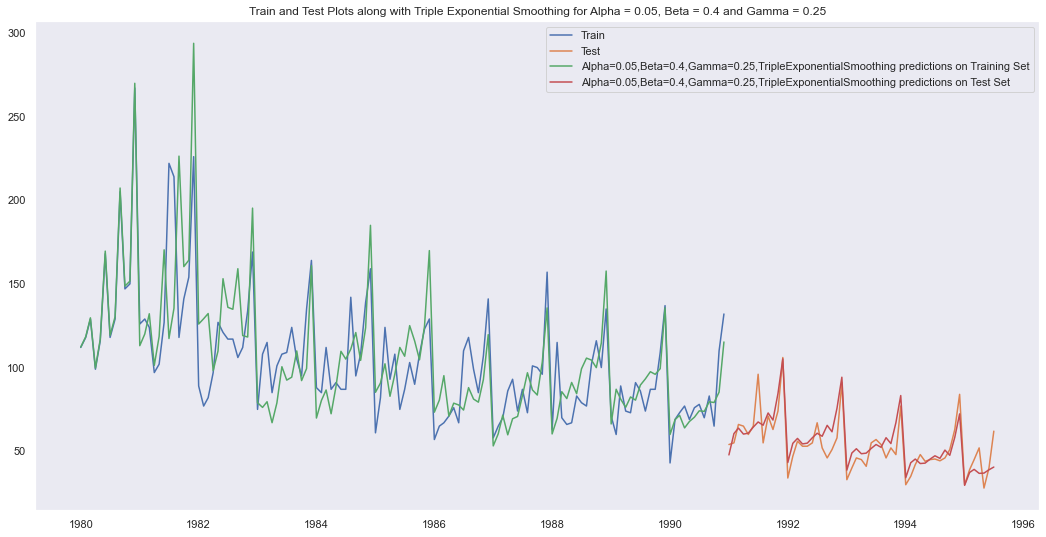

In [96]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0],resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Triple Exponential Smoothing for Alpha = 0.05, Beta = 0.4 and Gamma = 0.25')


plt.legend(loc='best')
plt.grid();

In [97]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_TES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    8.698606
Name: Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative, dtype: float64

## Inferences:
- It is observed that for Triple Exponential smoothing the minimum value of RMSE on Test is 8.6986 as obtained by using the iterative method for smoothing level $\alpha$ = 0.05, smoothing slope $\beta$ = 0.4 and smoothing seasonal $\gamma$ = 0.25.

In [98]:
printmd('**RMSE on Test Data of the Models build till now are as follows:**')
resultsDf

**RMSE on Test Data of the Models build till now are as follows:**

,Test RMSE
Regression On Time,15.278369
Naive Model,79.745697
Simple Average Model,53.488233
"Alpha=0.0987, Simple Exponential Smoothing Optimized",36.824482
"Alpha=0.1579, Beta=0.1579, Double Exponential Smoothing Optimized",70.604598
"Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative",16.343344
"Alpha=0.1061,Beta=0.0484,Gamma=0, Triple Exponential Smoothing Optimized",17.406842
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",8.698606


## Inferences:
- **From the above models, till now the best Test RMSE score of 8.6986 is obtained for Triple Exponential Model with smoothing level  𝛼  = 0.05, smoothing slope  𝛽  = 0.4 and smoothing seasonal  𝛾  = 0.25.**

# Stationary Tests for ARIMA/SARIMA models:

## Note:
- For Models like AR, MA, ARMA, ARIMA, SARIMA etc. the input time series must be stationary. We have visual methods and statistical tests to confirm stationarity of Time series. If the time series is not stationary we need to perform appropriate steps to make it stationary.
- Stationarity may be checked by using Global(overall time series) vs Local(time series is broken into small time periods) plots where the global mean, variance and local means, varainces are compared. Also the local means, variances are compared among themselves.
- A more appropriate statistically sound test is the Augmented Dickey Fuller (ADF) test. Here the Null and Alternate Hypothesis are as follows:
    - **Null Hypothesis :** The Time series is non-stationary.
    - **Alternate Hypothesis :** The Time series is stationary.
- **Here we will reject the Null hypothesis at a significance level of 95% (alpha = 0.05)** i.e. a p value of less than equal to 0.05 for the ADF test will be evidence enough to reject the Null hypothesis and thereby the time series will be considered stationary.

In [99]:
## Window = 5

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    ## GLOBAL vs LOCAL Tests
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics:
    plt.figure(figsize =(20,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    Overall_mean = plt.axhline(y=timeseries.mean(), color='green', label='Global Mean', linestyle='-')
    Overall_std = plt.axhline(y=timeseries.std(), color='yellow', label='Global Std', linestyle='-')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    ## ADF Test
    #Perform Dickey-Fuller test:
    printmd('**Results of Dickey-Fuller Test:**')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

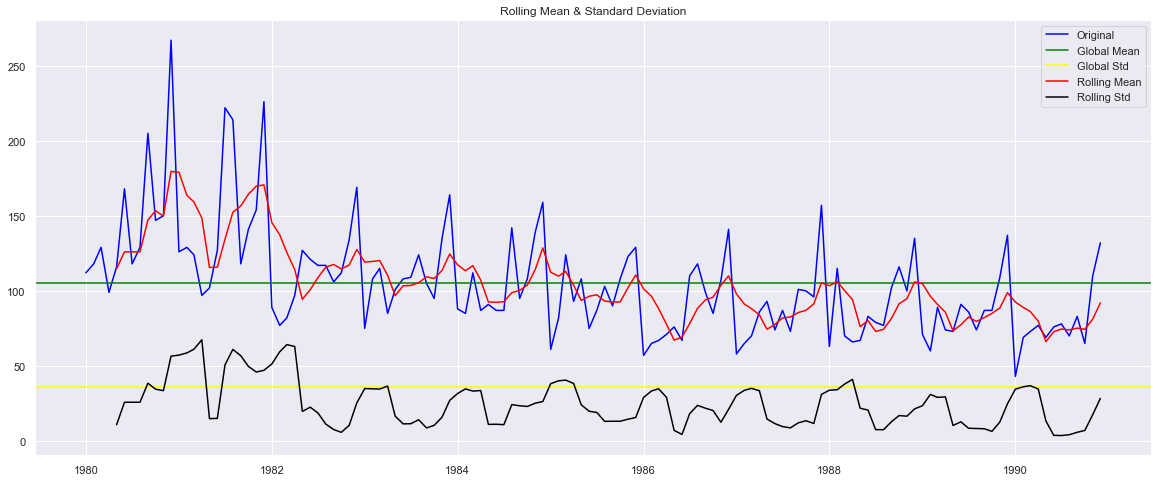

**Results of Dickey-Fuller Test:**

Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [100]:
test_stationarity(train_rose)

## Inferences:
- The Mean and standard deviation are varying, the local values are not constant.
- **The ADF test gives a p value 0.22 approx which suggest that we do not have enough statistical evidence to reject the Null hypothesis, i.e. we fail to reject the Null hypothesis.** Hence the time series cannot be considered to be stattionary and we need to perform certain steps to make it stationary.

## Calculating the 1st difference:
- This is done to remove any additive trend present in the series. If it is not stationary, then we may need to do further differencing.

In [101]:
train_rose_first_diff = train_rose.diff(1)

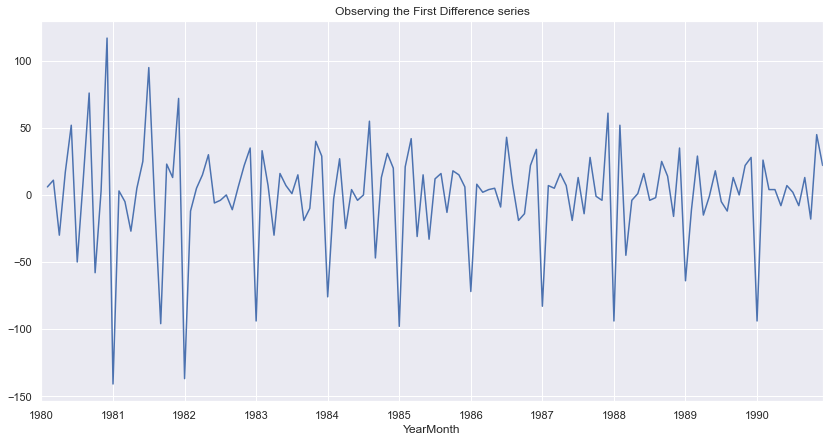

In [102]:
train_rose_first_diff.plot()
plt.title('Observing the First Difference series');

In [103]:
printmd('**Results of Dickey-Fuller Test:**')
dftest = adfuller(train_rose_first_diff.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

**Results of Dickey-Fuller Test:**

Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



## Inferences:
- We observe that the first difference is enough to stationarize the series as the ADF test gives a p value of 7.06e-09 approximately. This suggests that we have enough evidence to reject the Null hypothesis and **thus the first difference series can be considered to be stationary.** 
- **So in the future models we will use the 'd' parameter equal to 1.**

## Conclusion from Stationarity Tests:
- The time series was not statinary initially as observed from the ADF test. A first difference of the series was taken and it was observed that the series is stationarize after taking the first difference.

# Automated version of ARIMA and SARIMA based on lowest Akaike Information Criteria (AIC):

## Method 7: ARIMA model Automated
- Note that the values of p and q parameter will be varied but the 'd' parameter in ARIMA model will be fixed at 1 as we need the first difference series to stationarize the series.

In [104]:
import itertools
p = range(0, 5)
q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
printmd('**Some parameter combinations for the Model:**')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

**Some parameter combinations for the Model:**

Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)


In [105]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [106]:
for param in pdq:
    ARIMA_model = ARIMA(train_rose.values,order=param).fit()
#     print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [107]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
ARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the ARIMA model:', len(ARIMA_AIC))
printmd('**Observing the top 10 (p,d,q) after sorting based on AIC:**')
ARIMA_AIC.head(10)

Total combinations run on the ARIMA model: 20


**Observing the top 10 (p,d,q) after sorting based on AIC:**

,param,AIC
0,"(3, 1, 3)",1273.194272
1,"(0, 1, 2)",1276.835376
2,"(1, 1, 2)",1277.359224
3,"(1, 1, 1)",1277.775753
4,"(0, 1, 3)",1278.074258
5,"(2, 1, 1)",1279.045689
6,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312640
8,"(3, 1, 1)",1279.605965
9,"(0, 1, 1)",1280.726183


## Inferences:
- For the ARIMA model the minimum AIC value is observed for ARIMA(3,1,3) model.
- We will observe the summary of the ARIMA(3,1,3) model next.

In [108]:
mod = ARIMA(train_rose, order=ARIMA_AIC['param'][0], freq=train_rose.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.357
Date:                Mon, 19 Oct 2020   AIC                           1273.194
Time:                        17:20:20   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.382      0.000      -0.894      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.30

## Inferences:
- The AIC and BIC values along with the p values of different AR, MA lags are observed for the ARIMA(3,1,3) model. The p value of ma.L1.D.Rose and ma.L2.D.Rose show statistically insignificant contribution when considered for significance level of 95%.

In [109]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [110]:
printmd('**Viewing the first five Predictions for Test Data:**')
predict_test.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    74.744816
1991-02-01    75.570897
1991-03-01    81.686928
1991-04-01    59.773625
1991-05-01    70.394828
Freq: MS, dtype: float64

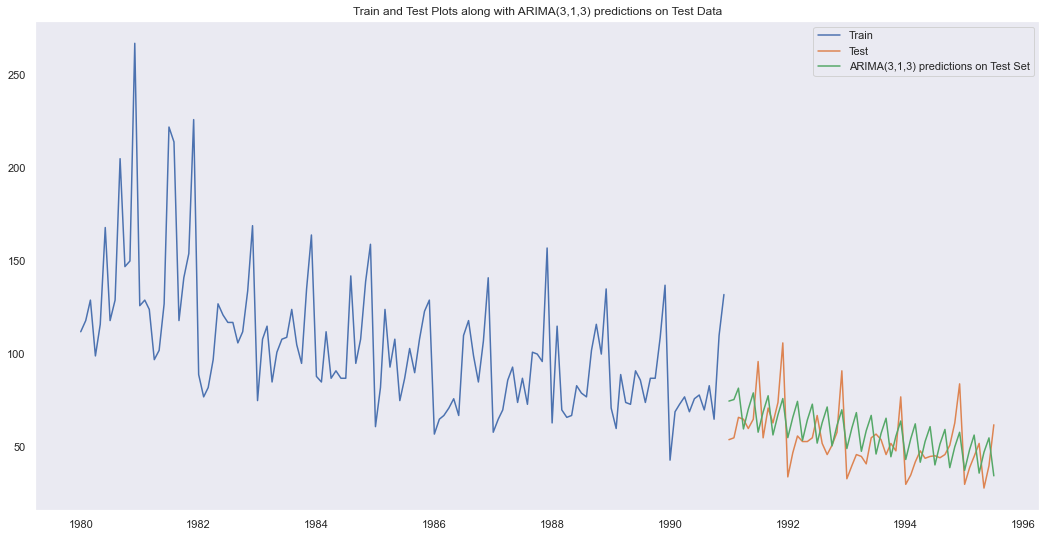

In [111]:
plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='ARIMA(3,1,3) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(3,1,3) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

## Model Evaluation:

In [112]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("ARIMA(3,1,3) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(3,1,3) Model forecast on the Test Data,  RMSE is 16.000


## Inferences:
- The RMSE value on Test for the ARIMA(3,1,3) model is 16.

In [113]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

## Method 8: SARIMA Model Automated
- Along with p,q parameters the of P, D and Q parameters will also be varied. As observed an annual seasonality is observed so the seasonal period will be taken as 12.

In [114]:
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(0,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [115]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [116]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207386
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301633055
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014775948
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386086
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635749863
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601615
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.733218265484
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697536
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945708
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374423
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729146984
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244226533
SARIMA(

SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409477378995
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713689323
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909377135573
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488808365
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705667524164
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932584549016
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8316038961553
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464441173273
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3781889288402
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6687980805851
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442288521
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.70365227517
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9960996608393


In [117]:
SARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
SARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the SARIMA model:', len(SARIMA_AIC))
printmd('**Observing the top 10 (p,d,q)x(P, D, Q, s)  after sorting based on AIC:**')
SARIMA_AIC.head(10)

Total combinations run on the SARIMA model: 162


**Observing the top 10 (p,d,q)x(P, D, Q, s)  after sorting based on AIC:**

,param,seasonal,AIC
0,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
1,"(1, 1, 2)","(2, 1, 2, 12)",776.940107
2,"(2, 1, 2)","(2, 1, 2, 12)",776.996100
3,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
4,"(2, 1, 2)","(2, 1, 1, 12)",783.703652
5,"(1, 1, 1)","(2, 1, 2, 12)",783.899095
6,"(0, 1, 2)","(0, 1, 2, 12)",784.014096
7,"(2, 1, 2)","(0, 1, 2, 12)",784.140948
8,"(2, 1, 1)","(2, 1, 1, 12)",784.892805
9,"(0, 1, 2)","(1, 1, 2, 12)",785.823714


## Inferences:
- For the SARIMA model the minimum AIC value is observed for SARIMA(0, 1, 2)x(2, 1, 2, 12) model.
- We will observe the summary of the SARIMA(0, 1, 2)x(2, 1, 2, 12) model next.

In [118]:
mod = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                order=SARIMA_AIC['param'][0],
                                seasonal_order=SARIMA_AIC['seasonal'][0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Mon, 19 Oct 2020   AIC                            774.969
Time:                                    17:24:44   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

## Inferences:
- The AIC and BIC values along with the p values of different AR, MA lags are observed for the SARIMA(0, 1, 2)x(2, 1, 2, 12) model. The p value of ma.L2, ar.S.L12, ar.S.L24 ma.S.L24 and ma.S.L24 show statistically insignificant contribution when considered for significance level of 95%.

In [119]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [120]:
printmd('**Viewing the first five Predictions for Test Data:**')
predict_test.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    44.213621
1991-02-01    62.326592
1991-03-01    67.313393
1991-04-01    63.160831
1991-05-01    66.474507
Freq: MS, dtype: float64

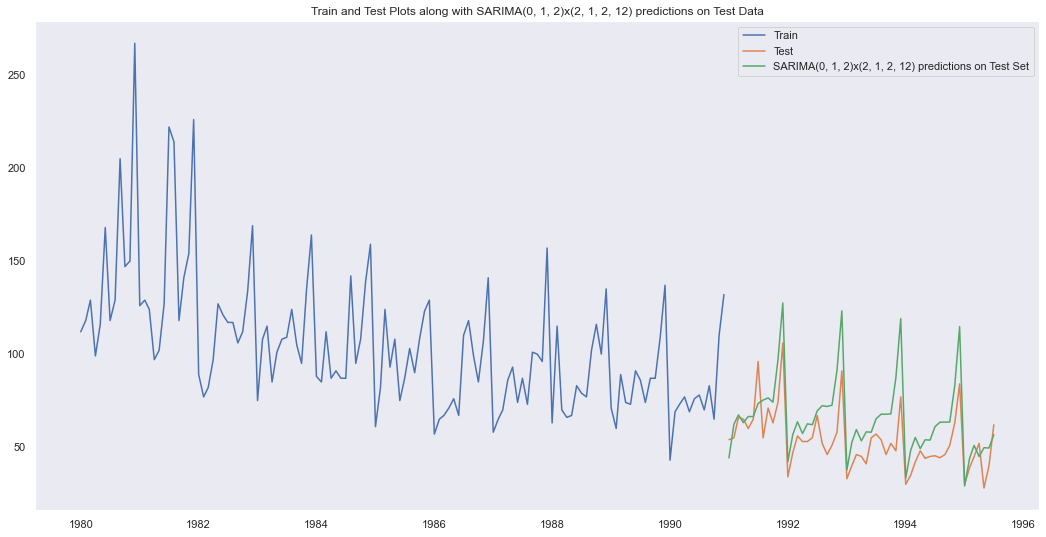

In [121]:

plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='SARIMA(0, 1, 2)x(2, 1, 2, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(0, 1, 2)x(2, 1, 2, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

## Model Evaluation:

In [122]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("SARIMA(0, 1, 2)x(2, 1, 2, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(0, 1, 2)x(2, 1, 2, 12) Model forecast on the Test Data,  RMSE is 16.528


## Inferences:
- The RMSE value on Test for the SARIMA(1, 1, 2)x(0, 1, 2, 12) model is 16.528.

In [123]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(3,1,3) Automated AIC",16.000069
"SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC",16.527753


## Inferences from ARIMA and SARIMA Automated models:
- The ARIMA and SARIMA models are selected based on the AIC on Train Data. It is observed that ARIMA(3,1,3) and SARIMA(0,1,2)x(2,1,2,12) have the minimum AIC values. The Test RMSE for ARIMA(3,1,3) is found to be 16 and for SARIMA(0,1,2)x(2,1,2,12) 16.528 approximately.

## ARIMA/SARIMA models based on the cut-off points of ACF and PACF:

In [124]:
print('The p value of the Dickey-Fuller Test on Train data:', adfuller(train_rose, autolag='AIC')[1])

The p value of the Dickey-Fuller Test on Train data: 0.21947564129072272


## Inferences:
- The p value on the train data suggests that it cannot be considered stationary.

In [125]:
train_first_diff = train_rose.diff(1)

In [126]:
print('The p value of the Dickey-Fuller Test after First Differencing:', adfuller(train_first_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing: 7.061943750943758e-09


## Inferences:
- As already established the the time series after first difference is stationary. Thus we can consider the d value equal to 1.

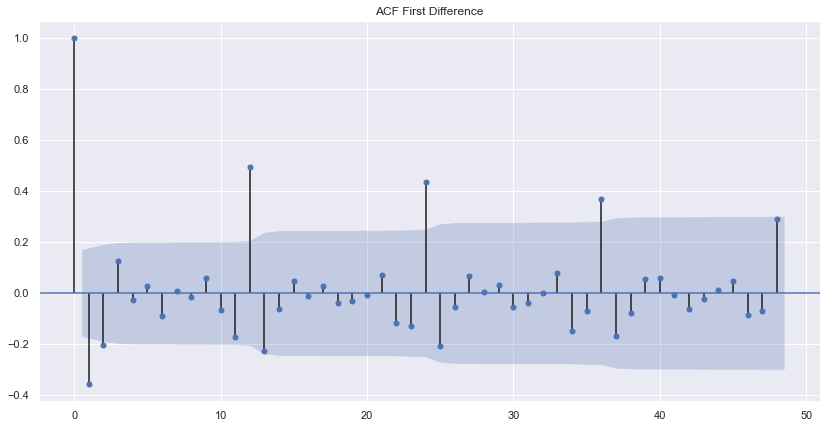

In [127]:
plot_acf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Difference');

## Inferences:
- After first differencing the ACF plot suggests that there is strong seasonality present which is tailing off. Hence we need to consider a **Seasonal First Difference of 12** (as observed in the initial plots) must be used for a proper model.
- For building an ARIMA model we cannot consider seasonality, hence we will consider the first difference plots to decide on the AR(p) and MA(q) terms.
    - From the acf plot it may be observed that till lag-2 significant lags are present and after lag-2 the lags are insignificant. So MA (q) term may be taken as 2. 

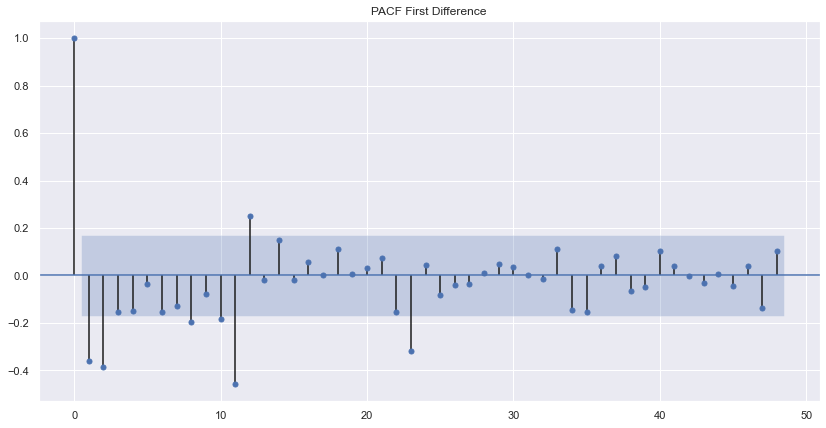

In [128]:
plot_pacf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('PACF First Difference');

## Inferences:
- From the pacf plot it may be observed that till lag-2 significant lags are present and after lag-2 the lags are insignificant. So AR (p) term may be taken as 2. 

## Method 9: ARIMA Model Manual
- The (p,d,q) values as observed from above are (2,1,2). **Although it must be noted that this is not a fixed rule. And the best way is as observed before to run a loop and find p,q parameters based on AIC on train data.**

In [129]:
mod = ARIMA(train_rose, order=(2,1,2), freq=train_rose.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Mon, 19 Oct 2020   AIC                           1279.299
Time:                        17:24:49   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [130]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [131]:
printmd('**Viewing the first five Predictions for Test Data:**')
predict_test.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    79.421516
1991-02-01    69.465699
1991-03-01    71.723479
1991-04-01    69.773120
1991-05-01    69.995581
Freq: MS, dtype: float64

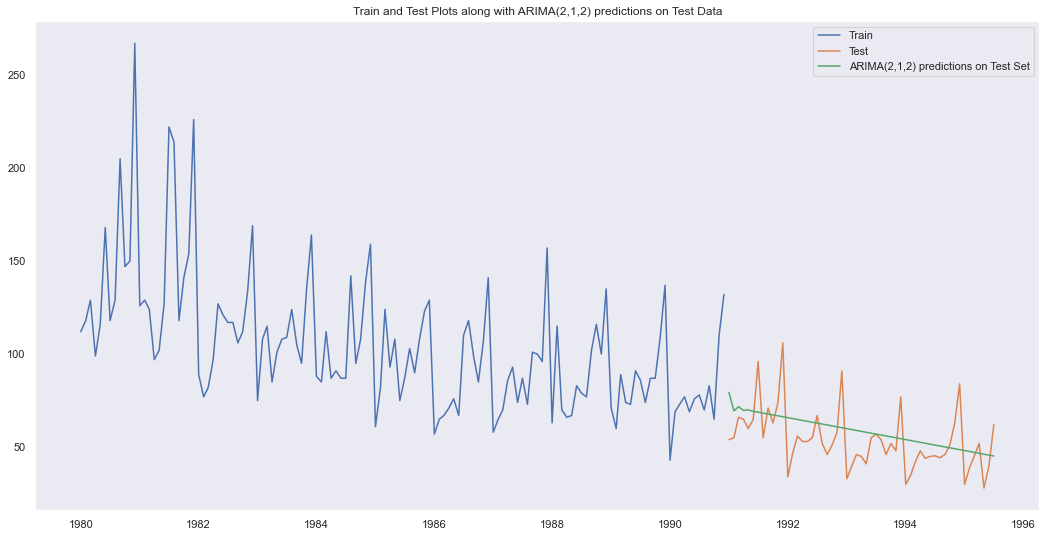

In [132]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='ARIMA(2,1,2) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(2,1,2) predictions on Test Data')         
plt.legend(loc='best')
plt.grid();

## Inferences:
- **Since the series has seasonality, we observe that the ARIMA model build on it is not appropriate and we need to build a SARIMA model and derive the p,q parameters from the acf and pacf plots after considering the seasonal difference as well.**

## Model Evaluation:

In [133]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is 15.364


## Inferences:
- The RMSE value on Test for the ARIMA(2,1,2) model is 15.36. 

In [134]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

## Seasonal Difference:
- Here we will consider the seasonal difference of s =12. As seasonality is observed it will be a more appropriate way of building the model. 
- The D parameter will be decided by checking stationarity on the seasonal differenced series.
- Reference: [https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/]

In [135]:
train_first_diff = train_first_diff.dropna()
train_first_seasonal_diff = train_first_diff - train_first_diff.shift(12)

In [136]:
print('The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift:',
      adfuller(train_first_seasonal_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift: 0.004222089763986072


## Inferences:
- The p value suggests that the time series after first difference and then first seasonal difference is stationary. Thus we can consider the D value equal to 1.

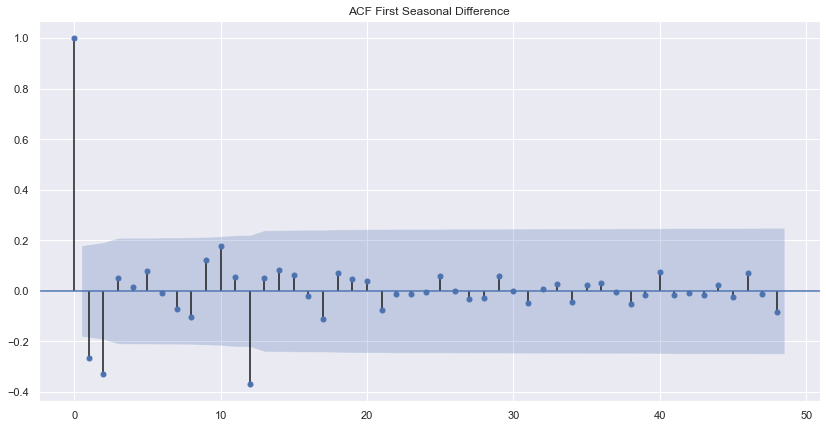

In [137]:
plot_acf(train_first_seasonal_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Seasonal Difference');

## Inferences:
- **When we used only first difference we observed in the seasonal lags were strongly present suggesting seasonality. Now after first seasonal difference such tailing seasonal lags are not observed.**
- From the Normal (within the first seasonal cycle) lags we observe that upto lag 2 it is significant. Thus we can consider MA(q) term as 2.
- From the seasonal lags it is observed that a seasonal lag of 1 is significant. Hence we can consider SMA(Q) term as 1.

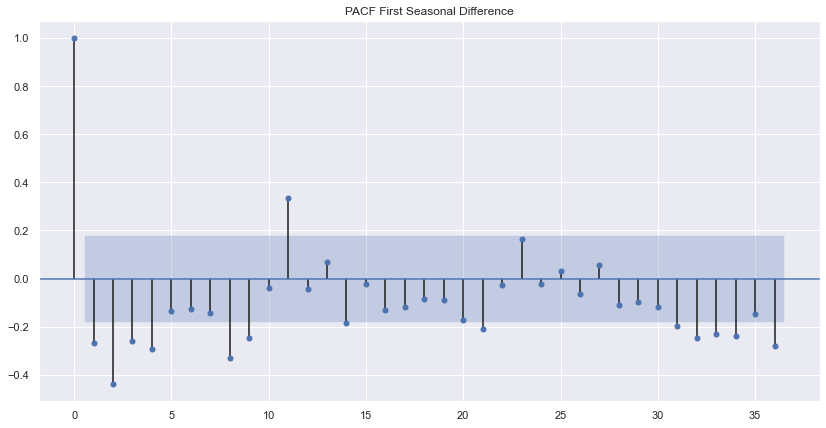

In [138]:
plot_pacf(train_first_seasonal_diff.dropna(),lags=36, alpha=0.05)
plt.title('PACF First Seasonal Difference');

## Inferences:
- From the Normal (within the first seasonal cycle) lags we observe that upto lag 4 it is significant. Thus we can consider AR(p) term as 4.
- From the seasonal lags we observe one significant lag. Thus one SAR terms could be added to the model. So we consider P as 1. 

## Method 10: SARIMA Model Manual
- The (p,d,q)x(P,D,Q,s) values as observed from above are (4,1,2)x(1,1,1,12). **Although it must be noted that this is not a fixed rule. And the best way is as observed before to run a loop and find p,q,P,Q parameters based on AIC on train data.**

In [139]:
mod = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                order=(4,1,2),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -443.798
Date:                              Mon, 19 Oct 2020   AIC                            905.596
Time:                                      17:24:52   BIC                            929.308
Sample:                                  01-01-1980   HQIC                           915.200
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8065      0.131     -6.169      0.000      -1.063      -0.550
ar.L2          0.05

**Residual Plot Diagnostics:**

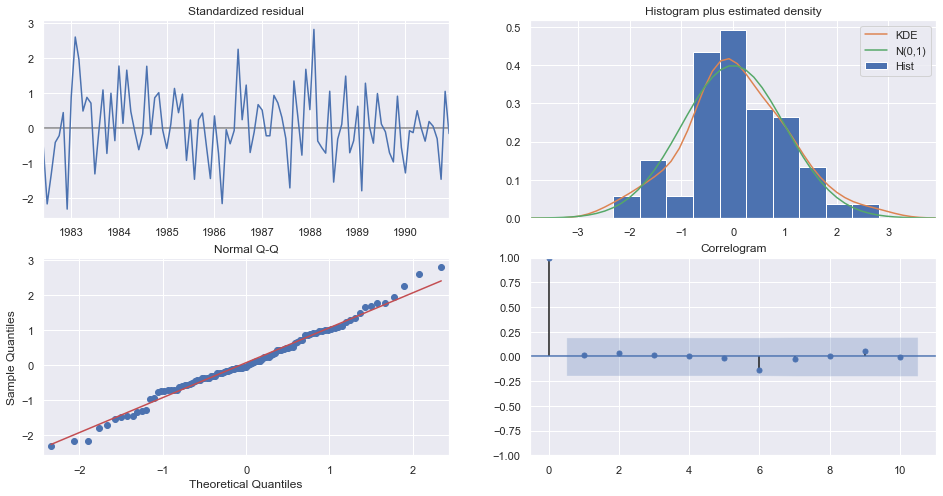

In [140]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
printmd('**Residual Plot Diagnostics:**')
plt.show()

## Inferences:
- It is observed from above that Residual is nearly Standard Normally distributed and Correlogram shows that there is no correlation in the residuals. Both this suggests that the SARIMA model captures the information and is a good enough model.

In [141]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [142]:
printmd('**Viewing the first five Predictions for Test Data:**')
predict_test.head()

**Viewing the first five Predictions for Test Data:**

1991-01-01    47.771617
1991-02-01    59.656058
1991-03-01    68.181572
1991-04-01    70.478001
1991-05-01    60.799078
Freq: MS, dtype: float64

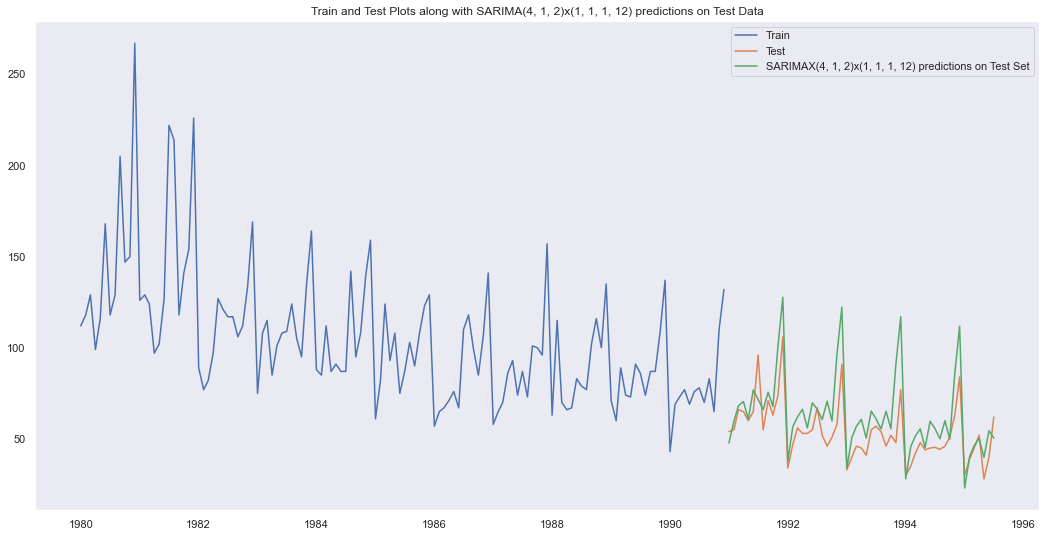

In [143]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='SARIMAX(4, 1, 2)x(1, 1, 1, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(4, 1, 2)x(1, 1, 1, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

## Model Evaluation:

In [144]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is 15.465


## Inferences:
- The RMSE value on Test for the SARIMA(4, 1, 2)x(1, 1, 1, 12) model is 15.47 approx.

In [145]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(2,1,2) ACF/PACF",15.363927
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",15.464686


## Inferences from Manual ARIMA/SARIMA Models:
- The ARIMA and SARIMA models are selected based on the ACF and PACF plots.The models are ARIMA(2,1,2) and SARIMA(4,1,2)x(2,1,1,12).
- The Test RMSE for ARIMA(2,1,2) is found to be 15.36 and for SARIMA(4,1,2)x(1,1,1,12), it is 15.46 approximately.

## Final RMSE values of all the Models:

In [146]:
printmd('**The Test RMSE of the all models build along with their corresponding parameters:**')
resultsDf.sort_values(by = 'Test RMSE')

**The Test RMSE of the all models build along with their corresponding parameters:**

,Test RMSE
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",8.698606
Regression On Time,15.278369
"ARIMA(2,1,2) ACF/PACF",15.363927
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",15.464686
"ARIMA(3,1,3) Automated AIC",16.000069
"Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative",16.343344
"SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC",16.527753
"Alpha=0.1061,Beta=0.0484,Gamma=0, Triple Exponential Smoothing Optimized",17.406842
"Alpha=0.0987, Simple Exponential Smoothing Optimized",36.824482
Simple Average Model,53.488233


## Inferences:
- The lowest RMSE score is 8.70 approximately for the model Triple Exponential Smoothing Iterative Model with parameters Alpha=0.05, Beta=0.4 and Gamma=0.25.

# Conclusion:
- A data frame is build based on all the models along with their corresponding parameters and the Test RMSE is observed. The lowest RMSE score is 8.70 approximately for the model Triple Exponential Smoothing Iterative Model with parameters Alpha=0.05, Beta=0.4 and Gamma=0.25.

# Forecast: 
- The next 12 months are forecasted.

## Optimum Model:
- **Based on the above the dataframe with all the models and their corresponding RMSE score on Test, Triple Exponential Smoothing with parameters smoothing level as 0.05, smoothing slope as 0.4 and smoothing seasonal as 0.25 is the most optimum model.**
- Hence we will consider the entire data to build a model using the Triple Smoothing model with the mentioned parameters and then predict 12 months into the future (i.e. 12 time stamps ahead) with a confidence interval of 95%.

In [147]:
fullmodel = ExponentialSmoothing(rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.05,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.25)

In [148]:
prediction = fullmodel.forecast(steps=12)

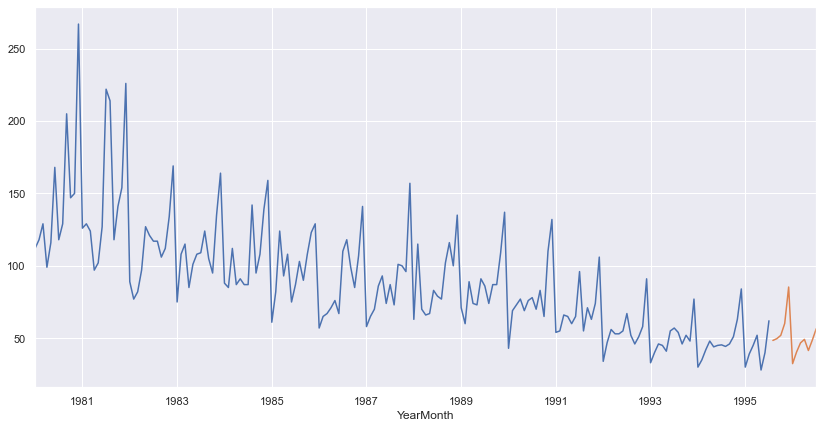

In [149]:
rose.plot()
prediction.plot();

In [150]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
pred_rose = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
printmd('**The upper and lower Confidence Intervals along with the forecast for next 12 months**')
pred_rose

**The upper and lower Confidence Intervals along with the forecast for next 12 months**

,lower_CI,prediction,upper_ci
1995-08-01,13.815121,48.412901,126.819559
1995-09-01,15.060839,49.658620,128.065277
1995-10-01,17.330649,51.928429,130.335087
1995-11-01,25.573704,60.171484,138.578142
1995-12-01,50.725668,85.323448,163.730106
1996-01-01,-2.196186,32.401595,110.808252
1996-02-01,5.789944,40.387724,118.794382
1996-03-01,12.117153,46.714933,125.121591
1996-04-01,14.573826,49.171606,127.578264
1996-05-01,6.873921,41.471701,119.878359


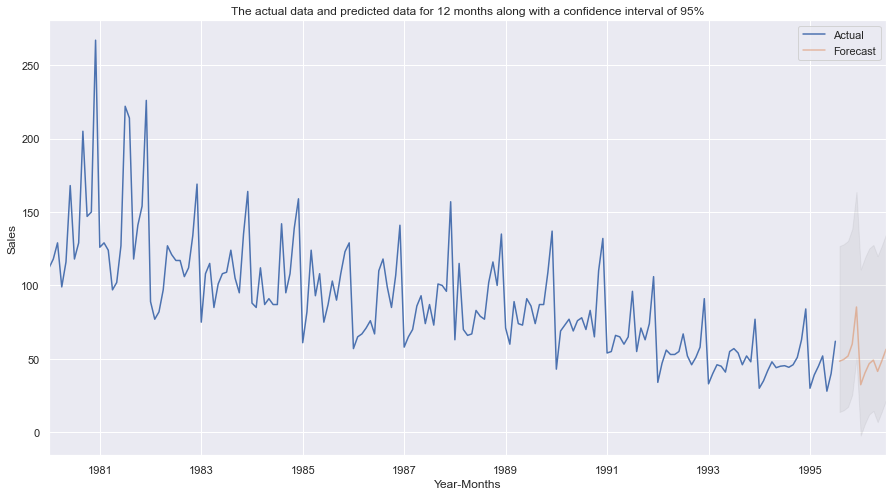

In [151]:
axis = rose.plot(label='Actual', figsize=(15,8))
pred_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_rose.index, pred_rose['lower_CI'], pred_rose['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('The actual data and predicted data for 12 months along with a confidence interval of 95%')
plt.legend(loc='best')
plt.show()

## Inferences:
- The 12 months future prediction from 1995-08-01 to 1996-07-01 is done and the plot observed with a 95% confidence interval.

# Conclusion:
- Based on the data frame with all the models and their corresponding RMSE score on Test, Triple Exponential Smoothing with parameters smoothing level as 0.05, smoothing slope as 0.4 and smoothing seasonal as 0.25 is the most optimum model.
- Hence the entire data is used to build a model using the Triple Smoothing model with the mentioned parameters and then 12 months Sales data into the future (i.e. 12 time stamps ahead) with a confidence interval of 95% is predicted.

## Insights from EDA:

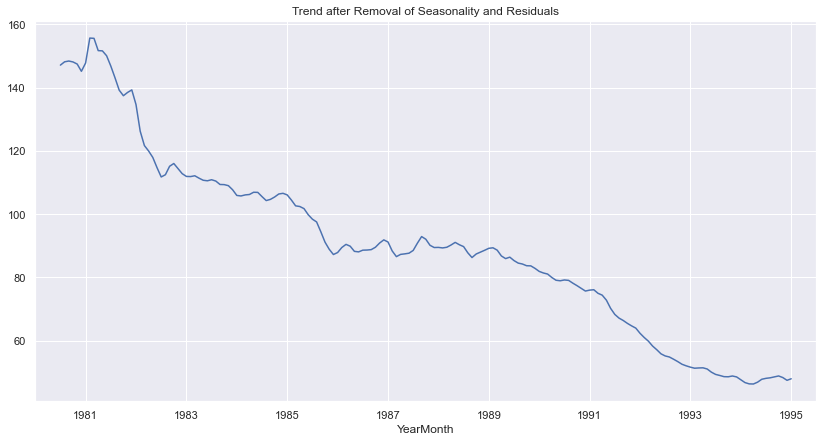

In [152]:
decomposition_mul.trend.plot()
plt.title('Trend after Removal of Seasonality and Residuals');

## Inferences:
- By observing the Trend it may be observed that there is an overall decreasing Trend in the Wine sales.

**Monthly Boxplot for all the years for Rose Dataset:**

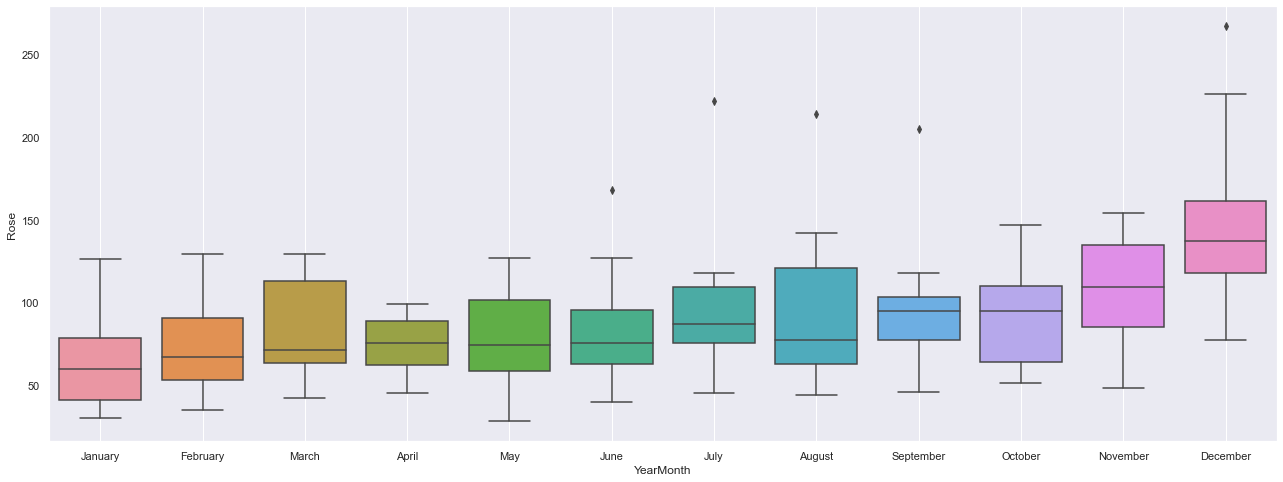

In [153]:
printmd('**Monthly Boxplot for all the years for Rose Dataset:**')
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose,ax=ax)
plt.grid();

## Inferences:
- Along the years Decemeber month seems to have higher sales compared to other months.

## Insights from the Model Build:

In [154]:
printmd('**Forecast from 1995-08-01 to 1996-07-01:**')
prediction

**Forecast from 1995-08-01 to 1996-07-01:**

1995-08-01    48.412901
1995-09-01    49.658620
1995-10-01    51.928429
1995-11-01    60.171484
1995-12-01    85.323448
1996-01-01    32.401595
1996-02-01    40.387724
1996-03-01    46.714933
1996-04-01    49.171606
1996-05-01    41.471701
1996-06-01    48.675426
1996-07-01    56.553837
Freq: MS, dtype: float64

**Forecast from 1995-08-01 to 1996-07-01:**

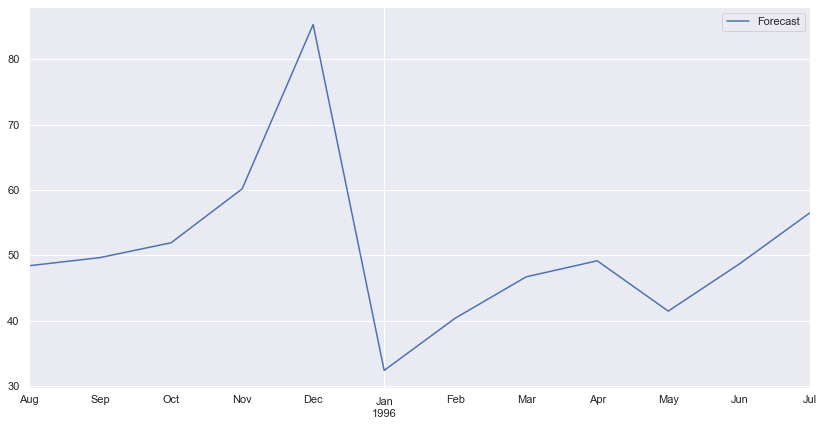

In [155]:
printmd('**Forecast from 1995-08-01 to 1996-07-01:**')
prediction.plot(label = 'Forecast');
plt.legend(loc='best')
plt.show()

## Inferences:
- Forecast of the upcoming 12 months from the model suggest that the highest sales are expected for the month of December (around 80) and lowest are expected for the month of January (around 30).

## Recommendations:
- For the last 15 years a downward trend in the sales of Rose wine is observed. Hence the reason behind such a decreasing trend has to be found out. This could because of external factors like competitors. Further the decreasing trend could be because of internal factors like Wine taste quality, Brand name, Distribution chain mismanagement. 
- There is a peak in sales especially for the month of December. This opportunity of higher sales in this month needs to be exploited by providing sales related incentives to the Distributors. 
- **Extra Information:** 
    - The model forecasting could be further improved if other exogenous variables related directly or indirectly to the Wine Sales could be collected and provided for analysis. 